In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix
import pickle


In [370]:
heart_data = pd.read_csv('/content/heart.csv')

In [371]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [372]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [373]:
heart_data.shape

(303, 14)

In [374]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [375]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [376]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [377]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [378]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [379]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [380]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [381]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [382]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [383]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [384]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [385]:
lr_train_prediction = lr_model.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_train_prediction, Y_train)

print('Accuracy on Training data (Logistic Regression): ', lr_training_data_accuracy)

Accuracy on Training data (Logistic Regression):  0.6652892561983471


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [386]:
lr_test_prediction = lr_model.predict(X_test)
lr_test_data_accuracy = accuracy_score(lr_test_prediction, Y_test)

print('Accuracy on Test data (Logistic Regression): ', lr_test_data_accuracy)

Accuracy on Test data (Logistic Regression):  0.6229508196721312


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [387]:
precision_lr = precision_score(Y_test, lr_test_prediction)
recall_lr = recall_score(Y_test, lr_test_prediction)
f2_lr = fbeta_score(Y_test, lr_test_prediction, beta=2)

In [388]:
print('Precision on Test data (Logistic Regression): ', precision_lr)
print('Recall on Test data (Logistic Regression): ', recall_lr)
print('F2 Score on Test data (Logistic Regression): ', f2_lr)

Precision on Test data (Logistic Regression):  0.8571428571428571
Recall on Test data (Logistic Regression):  0.36363636363636365
F2 Score on Test data (Logistic Regression):  0.4109589041095891


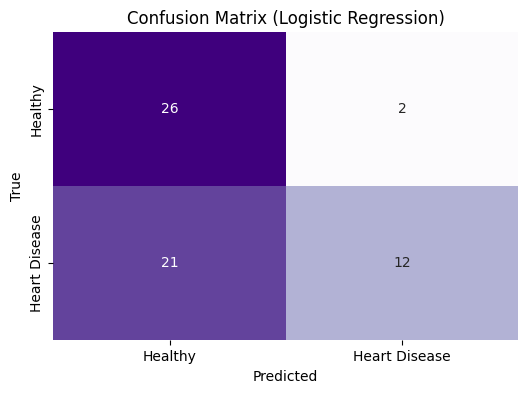

In [389]:
cm_lr = confusion_matrix(Y_test, lr_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [390]:
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [391]:
rf_test_prediction = rf_model.predict(X_test)
rf_test_data_accuracy = accuracy_score(rf_test_prediction, Y_test)

In [392]:
print('Accuracy on Test data (Random Forest): ', rf_test_data_accuracy)

Accuracy on Test data (Random Forest):  0.7868852459016393


In [393]:
precision_rf = precision_score(Y_test, rf_test_prediction)
recall_rf = recall_score(Y_test, rf_test_prediction)
f2_rf = fbeta_score(Y_test, rf_test_prediction, beta=2)

In [394]:
print('Precision on Test data (Random Forest): ', precision_rf)
print('Recall on Test data (Random Forest): ', recall_rf)
print('F2 Score on Test data (Random Forest): ', f2_rf)

Precision on Test data (Random Forest):  0.8125
Recall on Test data (Random Forest):  0.7878787878787878
F2 Score on Test data (Random Forest):  0.7926829268292682


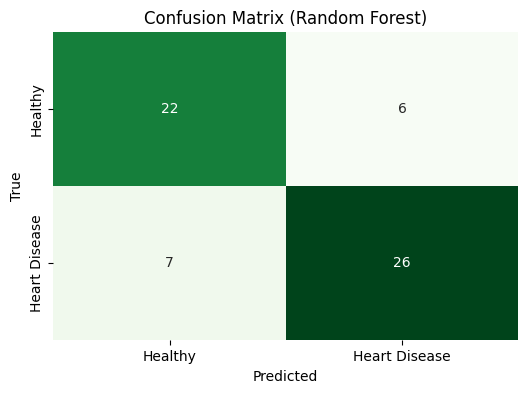

In [395]:
cm_rf = confusion_matrix(Y_test, rf_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [396]:

gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=2)

In [397]:
gb_test_prediction = gb_model.predict(X_test)
gb_test_data_accuracy = accuracy_score(gb_test_prediction, Y_test)

In [398]:
print('Accuracy on Test data (Gradient Boosting): ', gb_test_data_accuracy)

Accuracy on Test data (Gradient Boosting):  0.7377049180327869


In [399]:
precision_gb = precision_score(Y_test, gb_test_prediction)
recall_gb = recall_score(Y_test, gb_test_prediction)
f2_gb = fbeta_score(Y_test, gb_test_prediction, beta=2)

In [400]:
print('Precision on Test data (Gradient Boosting): ', precision_gb)
print('Recall on Test data (Gradient Boosting): ', recall_gb)
print('F2 Score on Test data (Gradient Boosting): ', f2_gb)

Precision on Test data (Gradient Boosting):  0.7741935483870968
Recall on Test data (Gradient Boosting):  0.7272727272727273
F2 Score on Test data (Gradient Boosting):  0.7361963190184049


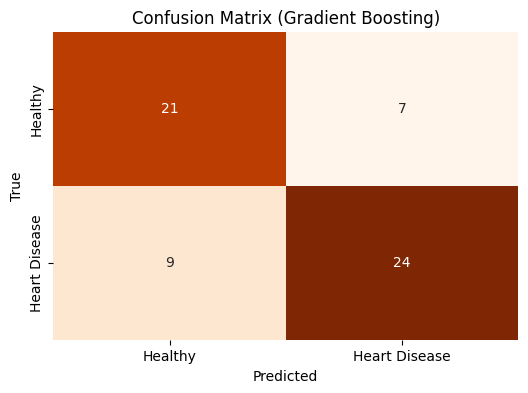

In [401]:
cm_gb = confusion_matrix(Y_test, gb_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [402]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [403]:
knn_test_prediction = knn_model.predict(X_test_scaled)
knn_test_data_accuracy = accuracy_score(knn_test_prediction, Y_test)

In [404]:
print('Accuracy on Test data (KNN): ', knn_test_data_accuracy)

Accuracy on Test data (KNN):  0.819672131147541


In [405]:
precision_knn = precision_score(Y_test, knn_test_prediction)
recall_knn = recall_score(Y_test, knn_test_prediction)
f2_knn = fbeta_score(Y_test, knn_test_prediction, beta=2)

In [406]:
print('Precision on Test data (KNN): ', precision_knn)
print('Recall on Test data (KNN): ', recall_knn)
print('F2 Score on Test data (KNN): ', f2_knn)

Precision on Test data (KNN):  0.84375
Recall on Test data (KNN):  0.8181818181818182
F2 Score on Test data (KNN):  0.8231707317073171


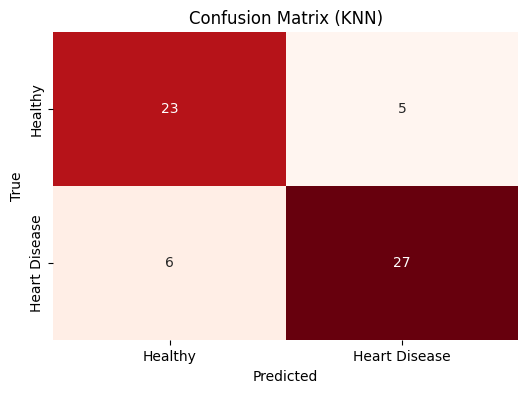

In [407]:
cm_knn = confusion_matrix(Y_test, knn_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [408]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [409]:
nb_test_prediction = nb_model.predict(X_test_scaled)
nb_test_data_accuracy = accuracy_score(nb_test_prediction, Y_test)

In [410]:
print('Accuracy on Test data (Naive Bayes): ', nb_test_data_accuracy)

Accuracy on Test data (Naive Bayes):  0.819672131147541


In [411]:
precision_nb = precision_score(Y_test, nb_test_prediction)
recall_nb = recall_score(Y_test, nb_test_prediction)
f2_nb = fbeta_score(Y_test, nb_test_prediction, beta=2)

In [412]:
print('Precision on Test data (Naive Bayes): ', precision_nb)
print('Recall on Test data (Naive Bayes): ', recall_nb)
print('F2 Score on Test data (Naive Bayes): ', f2_nb)

Precision on Test data (Naive Bayes):  0.8928571428571429
Recall on Test data (Naive Bayes):  0.7575757575757576
F2 Score on Test data (Naive Bayes):  0.78125


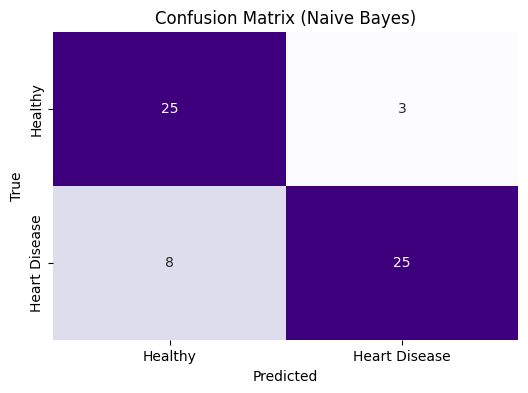

In [413]:
cm_nb = confusion_matrix(Y_test, nb_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [414]:
ada_model = AdaBoostClassifier(random_state=2)
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(random_state=2)

In [415]:
ada_test_prediction = ada_model.predict(X_test)
ada_test_data_accuracy = accuracy_score(ada_test_prediction, Y_test)

In [416]:
print('Accuracy on Test data (AdaBoost): ', ada_test_data_accuracy)

Accuracy on Test data (AdaBoost):  0.7704918032786885


In [417]:
precision_ada = precision_score(Y_test, ada_test_prediction)
recall_ada = recall_score(Y_test, ada_test_prediction)
f2_ada = fbeta_score(Y_test, ada_test_prediction, beta=2)

In [418]:
print('Precision on Test data (AdaBoost): ', precision_ada)
print('Recall on Test data (AdaBoost): ', recall_ada)
print('F2 Score on Test data (AdaBoost): ', f2_ada)

Precision on Test data (AdaBoost):  0.8275862068965517
Recall on Test data (AdaBoost):  0.7272727272727273
F2 Score on Test data (AdaBoost):  0.7453416149068324


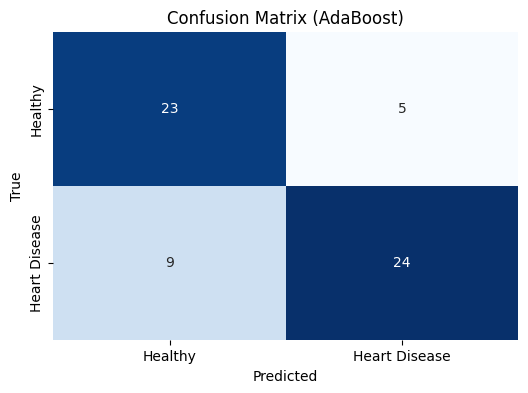

In [419]:
cm_ada = confusion_matrix(Y_test, ada_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [420]:
xgb_model = XGBClassifier(random_state=2)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [421]:
xgb_test_prediction = xgb_model.predict(X_test)
xgb_test_data_accuracy = accuracy_score(xgb_test_prediction, Y_test)

In [422]:
print('Accuracy on Test data (XGBoost): ', xgb_test_data_accuracy)

Accuracy on Test data (XGBoost):  0.7540983606557377


In [423]:
precision_xgb = precision_score(Y_test, xgb_test_prediction)
recall_xgb = recall_score(Y_test, xgb_test_prediction)
f2_xgb = fbeta_score(Y_test, xgb_test_prediction, beta=2)

In [424]:
print('Precision on Test data (XGBoost): ', precision_xgb)
print('Recall on Test data (XGBoost): ', recall_xgb)
print('F2 Score on Test data (XGBoost): ', f2_xgb)

Precision on Test data (XGBoost):  0.78125
Recall on Test data (XGBoost):  0.7575757575757576
F2 Score on Test data (XGBoost):  0.7621951219512195


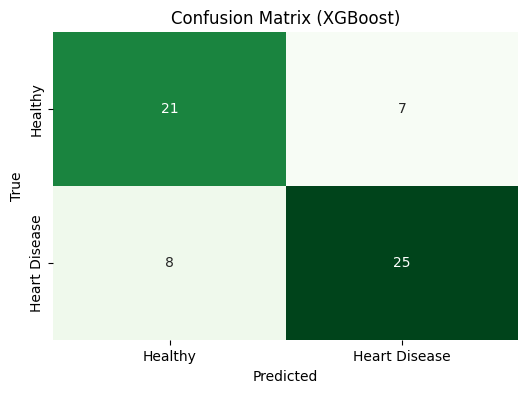

In [425]:
cm_xgb = confusion_matrix(Y_test, xgb_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [426]:
svm_model = SVC(kernel='rbf', random_state=2)
svm_model.fit(X_train_scaled, Y_train)

SVC(random_state=2)

In [427]:
X_test_scaled = scaler.transform(X_test)

In [428]:
svm_test_prediction = svm_model.predict(X_test_scaled)
svm_test_data_accuracy = accuracy_score(Y_test, svm_test_prediction)
print('Accuracy on Test data (SVM): ', svm_test_data_accuracy)

Accuracy on Test data (SVM):  0.8032786885245902


In [429]:
cm_svm = confusion_matrix(Y_test, svm_test_prediction)

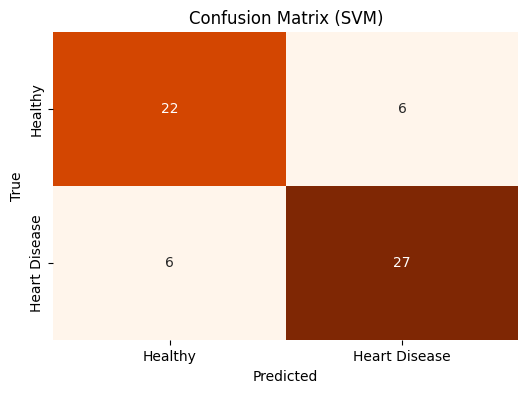

In [430]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Healthy', 'Heart Disease'],
            yticklabels=['Healthy', 'Heart Disease'])
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [431]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=2),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Gradient Boosting': GradientBoostingClassifier(random_state=2),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=2),
    'XGBoost': XGBClassifier(random_state=2),
}

In [432]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.819672131147541
Decision Tree Accuracy: 0.7704918032786885
SVM Accuracy: 0.6229508196721312
Random Forest Accuracy: 0.7868852459016393
Gradient Boosting Accuracy: 0.7377049180327869
KNN Accuracy: 0.6229508196721312
Naive Bayes Accuracy: 0.819672131147541
AdaBoost Accuracy: 0.7704918032786885
XGBoost Accuracy: 0.7540983606557377


In [433]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

In [434]:
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = best_model.predict(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [435]:
if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

The Person does not have a Heart Disease


In [436]:
filename = 'HealthNet_Heart.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [437]:
loaded_model = pickle.load(open('best_heart_disease_model.sav', 'rb'))
for column in X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


<ipython-input-438-ff597284716e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


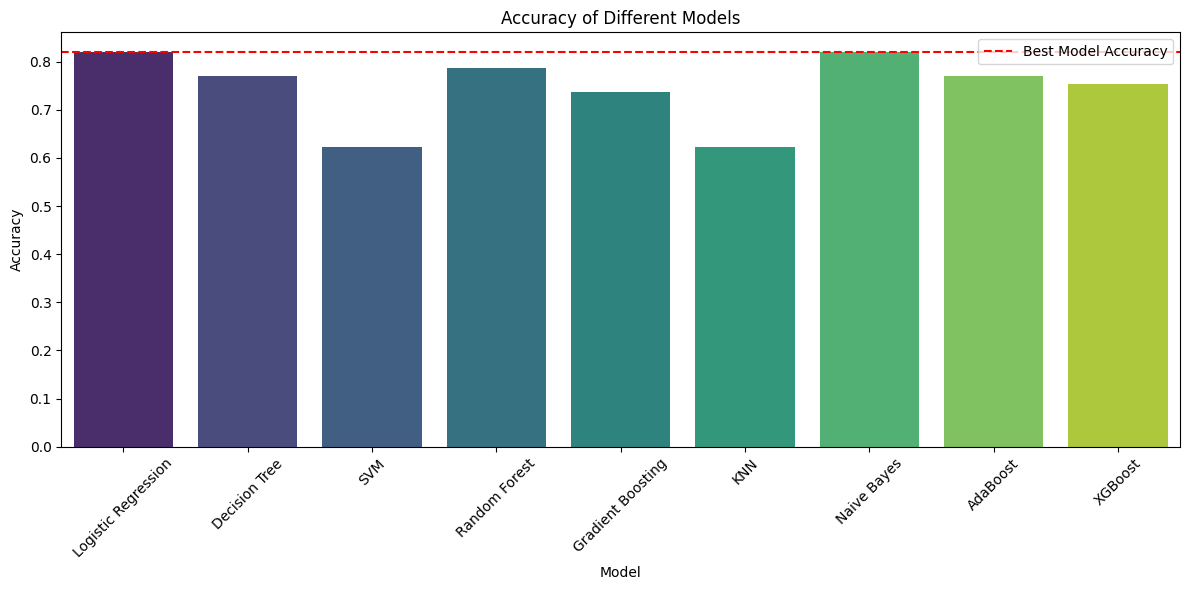

In [438]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.axhline(y=results[best_model_name], color='r', linestyle='--', label='Best Model Accuracy')
plt.legend()
plt.tight_layout()
plt.show()